In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2, os

In [ ]:
!unzip /content/archive.zip

unzip:  cannot find or open /content/archive.zip, /content/archive.zip.zip or /content/archive.zip.ZIP.


In [ ]:
data = pd.read_csv('/content/Top-50-musicality-global.csv')

In [ ]:
!rm -rf /content/archive.zip

In [ ]:
data.head()

,Unnamed: 0,Country,Track Name,Artist Name,Album Name,Popularity,Date,Markets,Danceability,Acousticness,...,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,TSignature,Positiveness
0,0,Global,Standing Next to You,Jung Kook,GOLDEN,91,2023-11-03,AR,0.711,0.0447,...,0.809,0.0,2,0.3390,-4.389,0,0.0955,106.017,4,0.816
1,1,Global,greedy,Tate McRae,greedy,100,2023-09-15,AR,0.750,0.2560,...,0.733,0.0,6,0.1140,-3.180,0,0.0319,111.018,1,0.844
2,2,Global,Si No Estás,iñigo quintero,Si No Estás,99,2022-09-23,AR,0.537,0.8270,...,0.421,0.0,5,0.1380,-8.720,1,0.0285,98.224,4,0.524
3,3,Global,Seven (feat. Latto) (Explicit Ver.),Jung Kook,GOLDEN,82,2023-11-03,AR,0.790,0.3120,...,0.831,0.0,11,0.0797,-4.185,1,0.0440,124.987,4,0.872
4,4,Global,Is It Over Now? (Taylor's Version) (From The V...,Taylor Swift,1989 (Taylor's Version),93,2023-10-26,AR,0.596,0.0504,...,0.658,0.0,0,0.1270,-7.346,1,0.0360,100.012,4,0.176


In [ ]:
data.isna().sum()

Unnamed: 0          0
Country             0
Track Name          6
Artist Name         6
Album Name          6
Popularity          0
Date                0
Markets             0
Danceability        0
Acousticness        0
duration            0
Energy              0
Instrumentalness    0
Key                 0
Liveness            0
Loudness            0
Mode                0
Speechiness         0
Tempo               0
TSignature          0
Positiveness        0
dtype: int64

In [ ]:
data.dropna(inplace = True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.drop(['Unnamed: 0','Artist Name','Track Name','Country','Album Name','Markets'],axis = 1,inplace =True)

In [ ]:
len(data.columns),data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3583 entries, 0 to 3588
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Popularity        3583 non-null   int64  
 1   Date              3583 non-null   object 
 2   Danceability      3583 non-null   float64
 3   Acousticness      3583 non-null   float64
 4   duration          3583 non-null   int64  
 5   Energy            3583 non-null   float64
 6   Instrumentalness  3583 non-null   float64
 7   Key               3583 non-null   int64  
 8   Liveness          3583 non-null   float64
 9   Loudness          3583 non-null   float64
 10  Mode              3583 non-null   int64  
 11  Speechiness       3583 non-null   float64
 12  Tempo             3583 non-null   float64
 13  TSignature        3583 non-null   int64  
 14  Positiveness      3583 non-null   float64
dtypes: float64(9), int64(5), object(1)
memory usage: 447.9+ KB


(15, None)

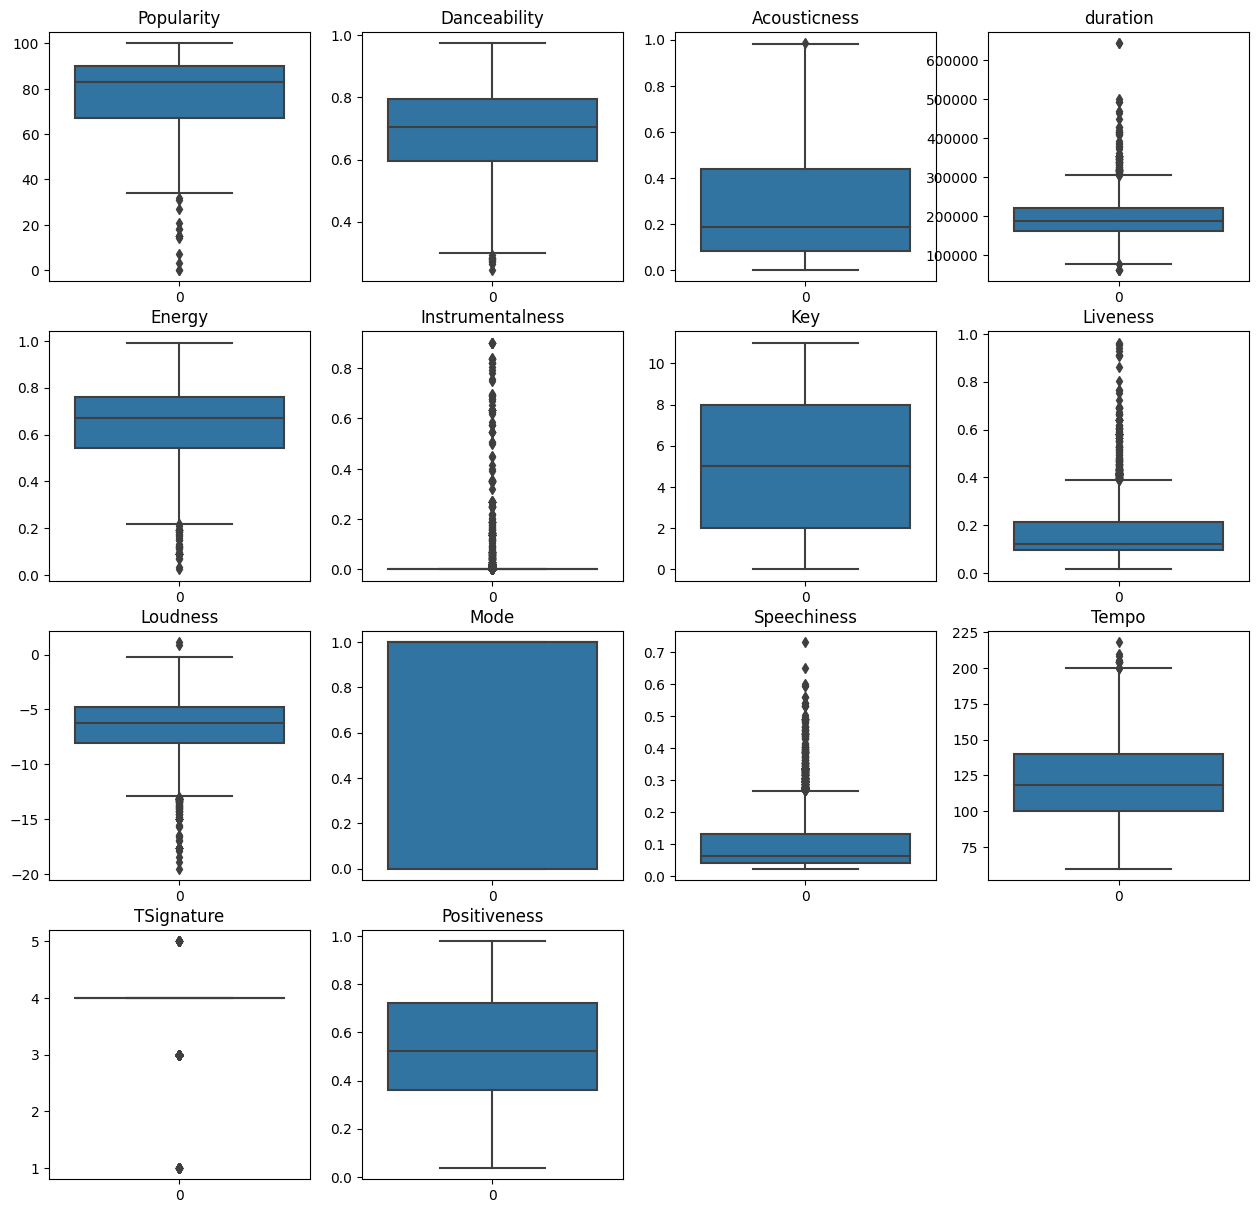

In [ ]:
counter = 0
for i in data.columns:
  if data[i].dtype != 'object':
    plt.subplot(4,4,counter+1)
    sns.boxplot(data[i])
    plt.subplots_adjust(right = 2,top = 2.5)
    plt.title(i)
    counter+=1

In [ ]:
['Popularity','Danceability','Duration','Energy','Liveness','Loudness','Speechiness','Tempo']

['Popularity',
 'Danceability',
 'Duration',
 'Energy',
 'Liveness',
 'Loudness',
 'Speechiness',
 'Tempo']

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data['Date'] = data['Date'].dt.strftime('%m-%y')

In [ ]:
data['Date'] = pd.to_datetime(data['Date'],format = '%m-%y')

In [ ]:
data['Date']

0      2023-11-01
1      2023-09-01
2      2022-09-01
3      2023-11-01
4      2023-10-01
          ...    
3584   2023-11-01
3585   2023-08-01
3586   2023-10-01
3587   2023-11-01
3588   2022-07-01
Name: Date, Length: 3583, dtype: datetime64[ns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3583 entries, 0 to 3588
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Popularity        3583 non-null   int64         
 1   Date              3583 non-null   datetime64[ns]
 2   Danceability      3583 non-null   float64       
 3   Acousticness      3583 non-null   float64       
 4   duration          3583 non-null   int64         
 5   Energy            3583 non-null   float64       
 6   Instrumentalness  3583 non-null   float64       
 7   Key               3583 non-null   int64         
 8   Liveness          3583 non-null   float64       
 9   Loudness          3583 non-null   float64       
 10  Mode              3583 non-null   int64         
 11  Speechiness       3583 non-null   float64       
 12  Tempo             3583 non-null   float64       
 13  TSignature        3583 non-null   int64         
 14  Positiveness      3583 n

In [ ]:
data['Pop'] = pd.cut(data['Popularity'],bins = [0,30,70,100],labels = ['Low','Medium','High'])

In [ ]:
data.Pop.value_counts()

High      2477
Medium    1092
Low         12
Name: Pop, dtype: int64

<Axes: xlabel='Date', ylabel='count'>

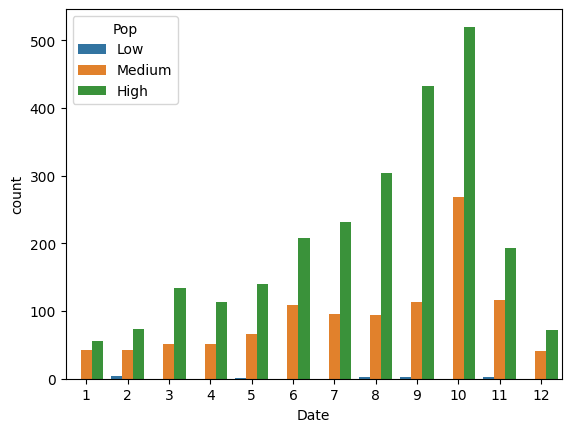

In [ ]:
sns.countplot(x = data['Date'].dt.month,hue= data['Pop'])

<Axes: >

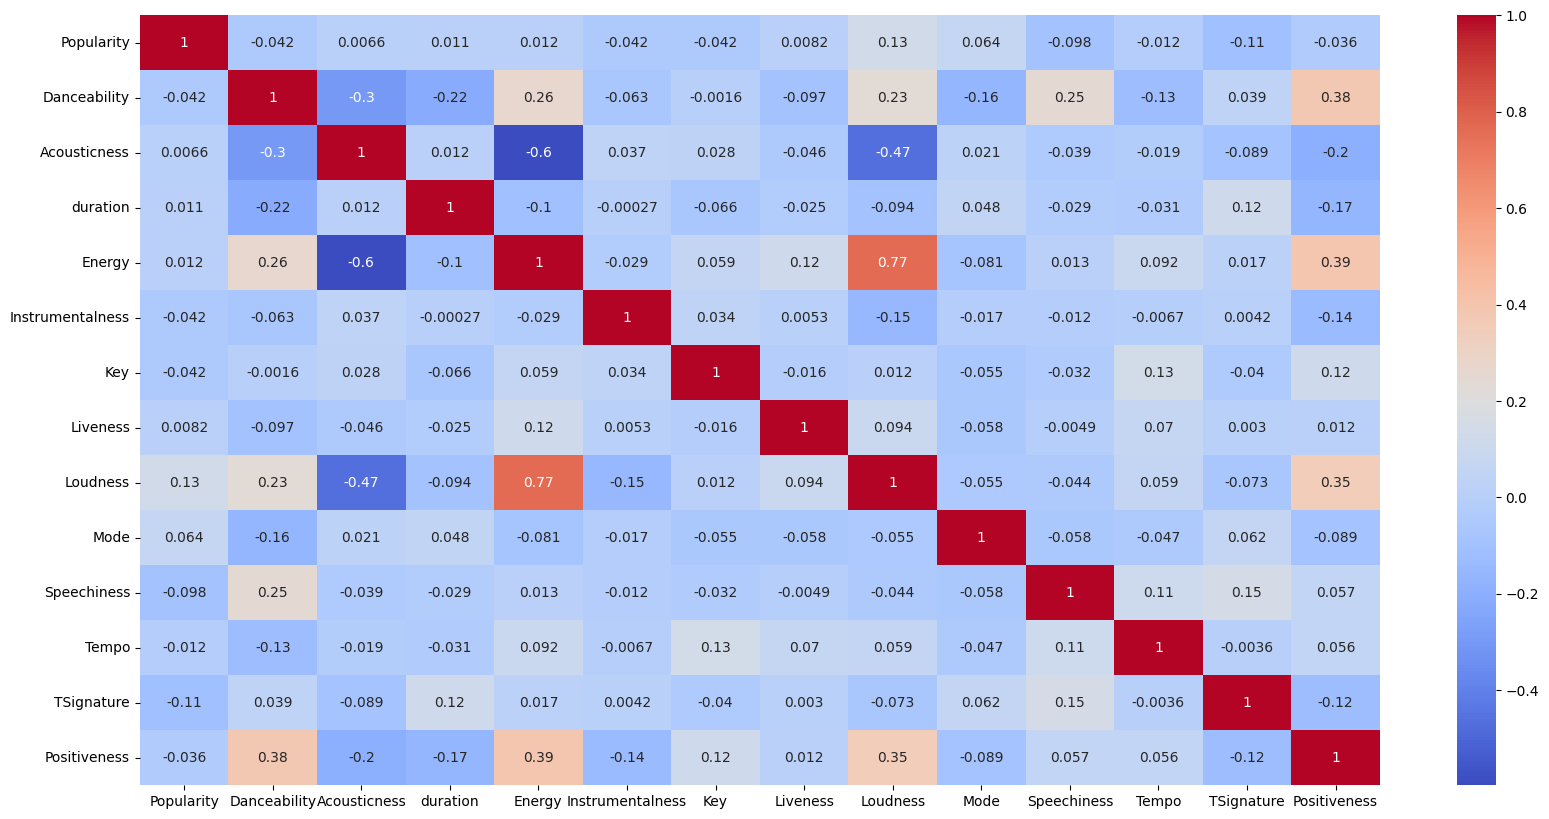

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),annot = True,cmap='coolwarm')

In [ ]:
!pip install -q pycaret

In [ ]:
from pycaret.regression import *

In [ ]:
df = data.drop(['Pop','Date'],axis = 1)

In [ ]:
se = setup(df,target = 'Popularity',session_id = 222)

,Description,Value
0,Session id,222
1,Target,Popularity
2,Target type,Regression
3,Original data shape,"(3583, 14)"
4,Transformed data shape,"(3583, 14)"
5,Transformed train set shape,"(2508, 14)"
6,Transformed test set shape,"(1075, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,4.6124,70.0525,8.3653,0.6717,0.1486,0.0764,1.1610
rf,Random Forest Regressor,5.2176,75.3494,8.6718,0.6472,0.1535,0.0859,2.2740
lightgbm,Light Gradient Boosting Machine,5.7880,84.2552,9.1713,0.6053,0.1591,0.0925,0.7200
xgboost,Extreme Gradient Boosting,5.2332,87.3351,9.3313,0.5905,0.1609,0.0853,0.2730
gbr,Gradient Boosting Regressor,8.7906,123.5208,11.1101,0.4210,0.1798,0.1307,0.9450
dt,Decision Tree Regressor,6.3188,139.6436,11.7921,0.3427,0.2060,0.1015,0.0590
knn,K Neighbors Regressor,7.6361,144.8588,12.0106,0.3217,0.1935,0.1220,0.0390
br,Bayesian Ridge,11.9525,203.6805,14.2657,0.0464,0.2154,0.1734,0.0250
lar,Least Angle Regression,11.8862,203.6464,14.2651,0.0462,0.2153,0.1723,0.0250
ridge,Ridge Regression,11.9246,203.6796,14.2661,0.0462,0.2153,0.1729,0.0250


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
df_1 = data.drop(['Popularity','Date'],axis = 1)

In [ ]:
from pycaret.classification import *

In [ ]:
data[data.Pop.isna()]

,Popularity,Date,Danceability,Acousticness,duration,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,TSignature,Positiveness,Pop
2340,0,2023-11-01,0.572,0.697,182038,0.565,0.0,1,0.169,-7.664,0,0.1730,96.246,4,0.152,NaN
3486,0,2023-11-01,0.742,0.179,148800,0.692,0.0,11,0.188,-3.687,1,0.0469,100.030,4,0.897,NaN


In [ ]:
data.loc[[2340,3486],'Pop'] = 'Low'

In [ ]:
data.Pop.isna().sum()

0

In [ ]:
se_1 = setup(df_1,target = 'Pop',session_id = 222)

,Description,Value
0,Session id,222
1,Target,Pop
2,Target type,Multiclass
3,Target mapping,"High: 0, Low: 1, Medium: 2"
4,Original data shape,"(3583, 14)"
5,Transformed data shape,"(3583, 14)"
6,Transformed train set shape,"(2508, 14)"
7,Transformed test set shape,"(1075, 14)"
8,Numeric features,13
9,Preprocess,True


In [ ]:
best1 = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7962,0.8971,0.7962,0.7932,0.7934,0.5166,0.5189,0.3410
rf,Random Forest Classifier,0.7859,0.8974,0.7859,0.7776,0.7780,0.4725,0.4785,0.7550
xgboost,Extreme Gradient Boosting,0.7847,0.8796,0.7847,0.7775,0.7786,0.4761,0.4802,0.5520
lightgbm,Light Gradient Boosting Machine,0.7835,0.8792,0.7835,0.7755,0.7744,0.4628,0.4715,1.3930
dt,Decision Tree Classifier,0.7707,0.7116,0.7707,0.7636,0.7639,0.4411,0.4460,0.1330
gbc,Gradient Boosting Classifier,0.7552,0.8198,0.7552,0.7438,0.7349,0.3618,0.3821,2.0910
knn,K Neighbors Classifier,0.7356,0.7612,0.7356,0.7199,0.7222,0.3347,0.3425,0.1120
qda,Quadratic Discriminant Analysis,0.7001,0.6950,0.7001,0.6725,0.6750,0.2145,0.2268,0.0670
ridge,Ridge Classifier,0.6966,0.0000,0.6966,0.6530,0.6157,0.0831,0.1253,0.0470
lr,Logistic Regression,0.6914,0.5364,0.6914,0.4780,0.5652,0.0000,0.0000,0.0950


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
x = data.drop(['Popularity','Pop','Date'],axis = 1)
y = data['Pop']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.1,random_state = 42)

In [ ]:
best1.fit(xtrain,ytrain)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=222, verbose=0, warm_start=False)

In [ ]:
ypred_class = best.predict(xtest)

In [ ]:
d = pd.DataFrame({'columns':x.columns,'importance':best1.feature_importances_})

In [ ]:
d

,columns,importance
0,Danceability,0.087808
1,Acousticness,0.083691
2,duration,0.088297
3,Energy,0.084177
4,Instrumentalness,0.070707
5,Key,0.079163
6,Liveness,0.081525
7,Loudness,0.107435
8,Mode,0.020930
9,Speechiness,0.091046


In [ ]:
x = data.drop(['Popularity','Pop','Date'],axis = 1)
y = data['Popularity']

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.1,random_state = 42)

In [ ]:
best.fit(xtrain,ytrain)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='squared_error',
                    max_depth=None, max_features=1.0, max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                    oob_score=False, random_state=222, verbose=0,
                    warm_start=False)

In [ ]:
d = pd.DataFrame({'columns':x.columns,'importance':best.feature_importances_})

In [ ]:
d

,columns,importance
0,Danceability,0.094452
1,Acousticness,0.087913
2,duration,0.087028
3,Energy,0.084332
4,Instrumentalness,0.051752
5,Key,0.081114
6,Liveness,0.073580
7,Loudness,0.110717
8,Mode,0.024348
9,Speechiness,0.074667
